# Titanic: Machine Learning from Disaster

 <https://www.kaggle.com/c/titanic>

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
% matplotlib inline

In [3]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
Xtrain = train.drop(['PassengerId', 'Survived', 'Cabin', 'Ticket'], axis=1)
Xtest = test.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)
Xtrain['is_test'] = False
Xtest['is_test'] = True
X = pd.concat([Xtrain, Xtest], axis=0)
X.index = range(len(X))
X.columns = X.columns.str.lower()

In [7]:
X.isnull().sum()

pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
is_test       0
dtype: int64

# Работаем с данными

In [8]:
X = pd.get_dummies(X, columns=['sex', 'pclass', 'embarked'])

In [9]:
X.head()

,name,age,sibsp,parch,fare,is_test,sex_female,sex_male,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,0,1,0,0,1,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,1,0,1,0,0,1,0,0
2,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,1,0,0,0,1,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,1,0,1,0,0,0,0,1
4,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,0,1,0,0,1,0,0,1


In [10]:
X['family']=X['sibsp']+X['parch']

In [11]:
X['alone']=np.where (X['family']==0,1,0)

In [12]:
X.family.value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family, dtype: int64

In [13]:
X['kid']=np.where (X['age']<16,1,0)

In [14]:
X['with_sibling_spouse']=np.where(X['sibsp']>0,1,0)
X['with_parent_or_child']=np.where(X['parch']>0,1,0)

In [15]:
X['female_with_spouse']=X['sex_female']*X['with_sibling_spouse']
X['male_with_spouse']=X['sex_male']*X['with_sibling_spouse']

In [16]:
X['female_class1']=X['sex_female']*X['pclass_1']
X['female_class2']=X['sex_female']*X['pclass_2']
X['female_class3']=X['sex_female']*X['pclass_3']

X['male_class1']=X['sex_male']*X['pclass_1']
X['male_class2']=X['sex_male']*X['pclass_2']
X['male_class3']=X['sex_male']*X['pclass_3']

In [17]:
X['big_family']=np.where(X['family']>3,1,0)

In [18]:
X['kid_big_family']=X['kid']*X['big_family']
X['female_big_family']=X['sex_female']*X['big_family']
X['male_big_family']=X['sex_male']*X['big_family']

In [19]:
X['kid_with_parents']= X['kid']* X['with_parent_or_child']

In [20]:
X.columns

Index(['name', 'age', 'sibsp', 'parch', 'fare', 'is_test', 'sex_female',
       'sex_male', 'pclass_1', 'pclass_2', 'pclass_3', 'embarked_C',
       'embarked_Q', 'embarked_S', 'family', 'alone', 'kid',
       'with_sibling_spouse', 'with_parent_or_child', 'female_with_spouse',
       'male_with_spouse', 'female_class1', 'female_class2', 'female_class3',
       'male_class1', 'male_class2', 'male_class3', 'big_family',
       'kid_big_family', 'female_big_family', 'male_big_family',
       'kid_with_parents'],
      dtype='object')

In [29]:
X=X.drop(['name','sibsp', 'parch'], axis=1)


ValueError: labels ['name' 'sibsp' 'parch'] not contained in axis

In [30]:
X['age'].fillna(X['age'].mean(), inplace=True)
X['fare'].fillna(X['fare'].mean(), inplace=True)

In [31]:
X.isnull().sum()

age                     0
fare                    0
is_test                 0
sex_female              0
sex_male                0
pclass_1                0
pclass_2                0
pclass_3                0
embarked_C              0
embarked_Q              0
embarked_S              0
family                  0
alone                   0
kid                     0
with_sibling_spouse     0
with_parent_or_child    0
female_with_spouse      0
male_with_spouse        0
female_class1           0
female_class2           0
female_class3           0
male_class1             0
male_class2             0
male_class3             0
big_family              0
kid_big_family          0
female_big_family       0
male_big_family         0
kid_with_parents        0
dtype: int64

In [32]:
y=train.Survived

In [33]:
X_cut=X[X['is_test']==0]
X_cut=X_cut.drop(['is_test'],axis=1)

In [34]:
X_test=X[X['is_test']==1]
X_test=X_test.drop(['is_test'],axis=1)

In [35]:
len(X_cut)

891

## Logistic Regression

In [36]:
X_cut=X_cut.drop(['kid', 'male_with_spouse', 'female_with_spouse', 'family', 'kid_big_family'], axis=1)

In [37]:
# Fit logistic regression
from sklearn.linear_model import LogisticRegression
# LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
#                    fit_intercept=True, intercept_scaling=1, class_weight=None, 
#                    random_state=None, solver='liblinear', max_iter=100,
#                    multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [38]:
model = LogisticRegression().fit(X_cut, y)

In [39]:
type(model.coef_[0])

numpy.ndarray

In [40]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x7f11d539c9e8>,
 <a list of 23 Text yticklabel objects>)

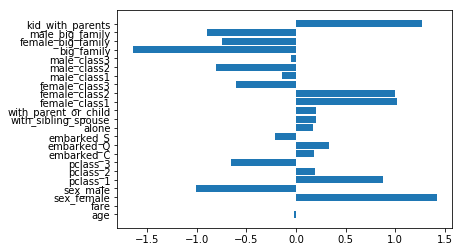

In [41]:
plt.barh( np.arange(len(model.coef_[0])), model.coef_[0])
plt.yticks(np.arange(len(X_cut.columns)),X_cut.columns)

## Estimate quality

In [42]:
# Estimate quality
from sklearn.metrics import accuracy_score
# accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
predicted = model.predict(X_cut)
print (accuracy_score (y, predicted))

0.829405162738


## Create submission 

In [43]:
X_test=X_test.drop(['kid', 'male_with_spouse', 'female_with_spouse', 'family','kid_big_family'], axis=1)
predicted = model.predict(X_test)

In [44]:
with open('submission.csv', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(test['PassengerId'], predicted):
        out.write('%s,%s\n' % (passenger, y))

# Кросс-валидация

In [45]:
y=train.Survived

In [46]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:

#
#   KFold(n_splits=3, shuffle=False, random_state=None)
#
#   cross_val_score(estimator, X, y=None, groups=None, scoring=None,
#                   cv=None, n_jobs=1, verbose=0, fit_params=None, 
#                   pre_dispatch='2*n_jobs')
#


kfold = KFold(n_splits=3, shuffle=True, random_state=123)

scores = cross_val_score(LogisticRegression(),
                         X_cut, y, groups=None,
                         scoring = 'accuracy',
                         cv = kfold)

In [48]:
print (scores)
print (np.average(scores))

[ 0.84175084  0.7979798   0.79124579]
0.810325476992


# Подбор гиперпараметров

In [49]:
# GridSearch
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# 
#   Ridge(alpha=1.0, fit_intercept=True, normalize=False, 
#         copy_X=True, max_iter=None, tol=0.001, 
#         solver='auto', random_state=None)
#
#   GridSearchCV(estimator, param_grid, scoring=None, fit_params=None,
#                n_jobs=1, iid=True, refit=True, cv=None, verbose=0, 
#                pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True) 

In [50]:
model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [51]:
param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]} ]

grid = GridSearchCV(LogisticRegression(), param_grid, 
                    scoring='accuracy',
                    cv=kfold)

In [52]:
model_grid_search = grid.fit(X_cut, y)

In [53]:
model_grid_search.cv_results_

{'mean_fit_time': array([ 0.02881074,  0.02383566,  0.02700861,  0.02894012,  0.01740082,
         0.03975026,  0.02423493]),
 'mean_score_time': array([ 0.00524759,  0.00601816,  0.00347098,  0.01332362,  0.00271765,
         0.0071578 ,  0.00524124]),
 'mean_test_score': array([ 0.76094276,  0.8013468 ,  0.81032548,  0.81593715,  0.81593715,
         0.81593715,  0.81593715]),
 'mean_train_score': array([ 0.77104377,  0.81257015,  0.82996633,  0.8338945 ,  0.83333333,
         0.83333333,  0.83333333]),
 'param_C': masked_array(data = [0.01 0.1 1 10 100 1000 10000],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000},
  {'C': 10000}),
 'rank_test_score': array([7, 6, 5, 1, 1, 1, 1], dtype=int32),
 'split0_test_score': array([ 0.77441077,  0.81818182,  0.84175084,  0.83838384,  0.83838384,
         0.83838384,  0.83838384]),
 'split0_train_score': array([ 

### видно, что при С=1 улучшение точности параметров на тестовой выборке максимальное, затем точность сильно не изменяется.

# Desicion Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

In [55]:
clf.fit(X_cut, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [56]:
predicted = clf.predict(X_test)

In [57]:
with open('submission.csv', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, prediction in zip(test['PassengerId'], predicted):
        out.write('%s,%s\n' % (passenger, prediction))

In [58]:
param_grid = [
  {'max_depth': [1,2,3,4,5,6,7,8,9,10]} ]

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                    scoring='accuracy',
                    cv=kfold)

In [59]:
tree_grid_search = grid_tree.fit(X_cut, y)

In [60]:
tree_grid_search.cv_results_

{'mean_fit_time': array([ 0.00733511,  0.00716249,  0.00888896,  0.01150107,  0.0084041 ,
         0.0089577 ,  0.00873645,  0.00930206,  0.00886003,  0.00886544]),
 'mean_score_time': array([ 0.00477926,  0.0022711 ,  0.00443904,  0.00471703,  0.00216778,
         0.00211   ,  0.00214958,  0.0022095 ,  0.00203753,  0.00199699]),
 'mean_test_score': array([ 0.78675645,  0.77441077,  0.81705948,  0.80022447,  0.79573513,
         0.80022447,  0.79236813,  0.79685746,  0.78451178,  0.78226712]),
 'mean_train_score': array([ 0.78675645,  0.79573513,  0.82716049,  0.84287318,  0.85465769,
         0.87766554,  0.88496072,  0.90965208,  0.9298541 ,  0.94332211]),
 'param_max_depth': masked_array(data = [1 2 3 4 5 6 7 8 9 10],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'params': ({'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_de

([<matplotlib.axis.YTick at 0x7f11d52a2438>,
 <a list of 23 Text yticklabel objects>)

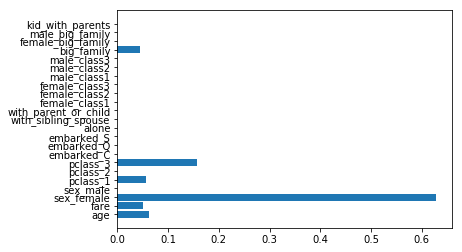

In [61]:
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X_cut.columns)),X_cut.columns)

# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
frst_clf = RandomForestClassifier(n_estimators=1000, max_depth=6)

In [71]:
frst_clf.fit(X_cut, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [72]:
results=frst_clf.predict(X_test)

In [74]:
with open('submission.csv', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, prediction in zip(test['PassengerId'], results):
        out.write('%s,%s\n' % (passenger, prediction))

In [69]:
param_grid = [
  {'max_depth': [1,2,3,4,5,6,7,8,9,10]} ]

grid_forest = GridSearchCV(RandomForestClassifier(n_estimators=1000), param_grid, 
                    scoring='accuracy',
                    cv=kfold)

forest_grid_search = grid_forest.fit(X_cut, y)

forest_grid_search.cv_results_

{'mean_fit_time': array([ 6.00970308,  5.9301966 ,  6.24703034,  6.11448137,  6.07125449,
         6.1429166 ,  6.20658159,  6.26407814,  6.36205252,  6.37208184]),
 'mean_score_time': array([ 0.39578708,  0.3959221 ,  0.39052629,  0.45273479,  0.40457431,
         0.41155092,  0.41823546,  0.42086871,  0.42578491,  0.4260242 ]),
 'mean_test_score': array([ 0.77665544,  0.78226712,  0.80808081,  0.82042649,  0.82154882,
         0.82603816,  0.82267116,  0.82154882,  0.81481481,  0.81144781]),
 'mean_train_score': array([ 0.78170595,  0.79461279,  0.81986532,  0.83277217,  0.84848485,
         0.86139169,  0.88945006,  0.91919192,  0.94163861,  0.95510662]),
 'param_max_depth': masked_array(data = [1 2 3 4 5 6 7 8 9 10],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'params': ({'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_de

([<matplotlib.axis.YTick at 0x7f11d409d5f8>,
 <a list of 23 Text yticklabel objects>)

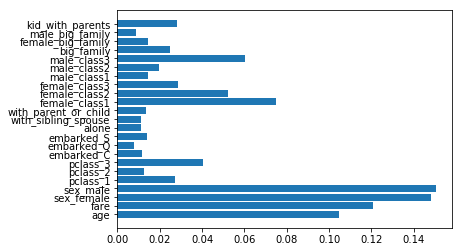

In [68]:
plt.barh(np.arange(len(frst_clf.feature_importances_)), frst_clf.feature_importances_)
plt.yticks(np.arange(len(X_cut.columns)),X_cut.columns)